In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

In [4]:
#Make a request for each of the cities
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q="

import json

responses = []

for x in range(len(cities)):
    print(f"Processing Record {x} of Set 1 | {cities[x]}")
    
    response = requests.get(query_url + cities[x])
    responses.append(response.json())

Processing Record 0 of Set 1 | busselton
Processing Record 1 of Set 1 | turayf
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | bambous virieux
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | manaure
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | port keats
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | vao
Processing Record 14 of Set 1 | san quintin
Processing Record 15 of Set 1 | taolanaro
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | henties bay
Processing Record 21 of Set 1 | chicama
Processing Record 22 of Set 1 | atar
Processing Record 23 of Set 1 | bredasdorp
Processing Record 24 

In [56]:
#Extract city weather data from responses list
max_temps = []
cities2 = []
lat = []
lon = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

for city in responses:
    try:
        cities2.append(city['name'])
        max_temps.append(city['main']['temp_max'])
        lat.append(city['coord']['lat'])
        lon.append(city['coord']['lon'])
        humidity.append(city['main']['humidity'])
        cloudiness.append(city['clouds']['all'])
        wind_speed.append(city['wind']['speed'])
        country.append(city['sys']['country'])
        date.append(city['dt'])
    except: 
        continue


In [105]:
#Change max_temps to farenheit
temps_f = []
for i in max_temps:
    f = ((i - 273.15) * (9/5)) + (32)
    temps_f.append(f)

In [116]:
#Create new dataframe with extracted data
cities_df = pd.DataFrame({
    "City": cities2,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temps_f,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})


In [117]:
#Save df as csv
cities_df.to_csv(output_data_file, index=False)

#Display df
cities_df

PermissionError: [Errno 13] Permission denied: 'output_data/cities.csv'

In [112]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,5.400000e+02
mean,18.918770,20.855553,50.023467,73.551852,52.668519,3.728593,1.610230e+09
std,33.487606,90.623398,32.016042,18.198633,38.669468,4.760451,8.076890e+01
min,-54.800000,-175.200000,-31.810000,10.000000,0.000000,0.150000,1.610230e+09
25%,-8.784900,-63.030050,28.994000,64.000000,10.750000,1.540000,1.610230e+09
50%,20.705800,26.778850,62.996000,77.500000,59.000000,3.030000,1.610230e+09
75%,49.658450,102.700000,76.217000,86.000000,90.000000,4.972500,1.610230e+09
max,78.218600,179.316700,91.652000,100.000000,100.000000,96.200000,1.610230e+09


In [113]:
#Inspect data to see if any cities have humidity > 100%. 
humidity_error = cities_df.loc[cities_df['Humidity'] > 100]
humidity_error

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [114]:
#Get the indices of cities that have humidity over 100%
humidity_error.index

Int64Index([], dtype='int64')

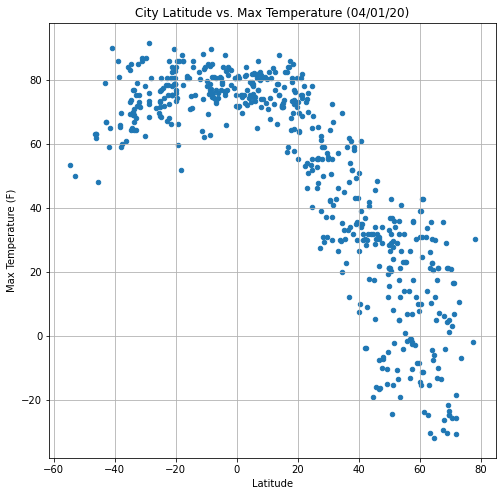

In [115]:
plot = cities_df.plot(kind="scatter", x="Lat", xlabel="Latitude", y="Max Temp", grid=True, figsize=(8,8), 
               title="City Latitude vs. Max Temperature (04/01/20)")
plot.set_xlabel('Latitude')
plot.set_ylabel('Max Temperature (F)')
plot.xaxis.get_label().set_visible(True)
plt.show()

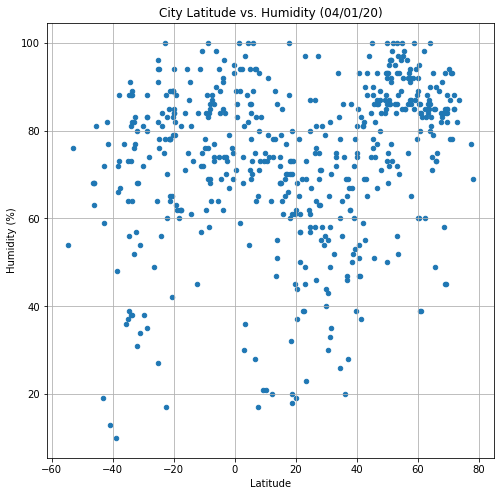

In [118]:
plot = cities_df.plot(kind="scatter", x="Lat", xlabel="Latitude", y="Humidity", grid=True, figsize=(8,8), 
               title="City Latitude vs. Humidity (04/01/20)")
plot.set_xlabel('Latitude')
plot.set_ylabel('Humidity (%)')
plot.xaxis.get_label().set_visible(True)
plt.show()

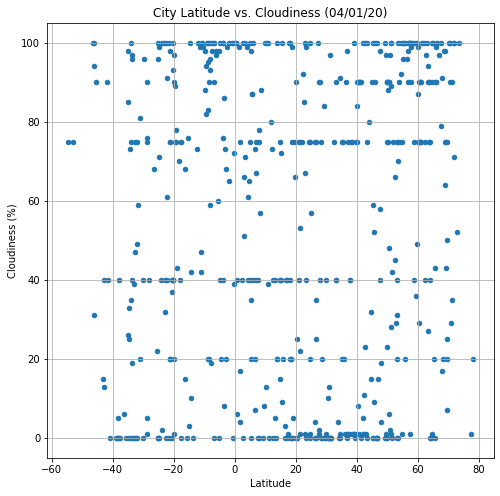

In [119]:
plot = cities_df.plot(kind="scatter", x="Lat", xlabel="Latitude", y="Cloudiness", grid=True, figsize=(8,8), 
               title="City Latitude vs. Cloudiness (04/01/20)")
plot.set_xlabel('Latitude')
plot.set_ylabel('Cloudiness (%)')
plot.xaxis.get_label().set_visible(True)
plt.show()

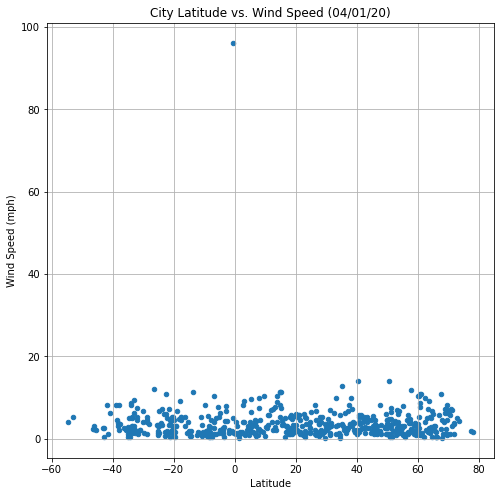

In [125]:
plot = cities_df.plot(kind="scatter", x="Lat", xlabel="Latitude", y="Wind Speed", grid=True, figsize=(8,8), 
               title="City Latitude vs. Wind Speed (04/01/20)")
plot.set_xlabel('Latitude')
plot.set_ylabel('Wind Speed (mph)')
plot.xaxis.get_label().set_visible(True)
plt.show()

In [128]:
x_values = cities_df['Lat']
y_values = cities_df['Max Temp']
(slope, intecept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.show()

SyntaxError: invalid syntax (<ipython-input-128-274f15287876>, line 6)